# **Knowledge Representation and Insight Generation from Structured Datasets**
---
\
>### **Project Description:**
This project aims to develop an AI-based solution to process, analyze, and extract meaningful insights from a structured dataset named [Adult Income Dataset](https://archive.ics.uci.edu/dataset/2/adult). The key objectives are to preprocess the data, represent the knowledge effectively, and identify patterns to support decision-making processes.

# **Data Preprocessing**

In the data preprocessing phase, we will clean, transform, and prepare the dataset to ensure it is suitable for analysis. This involves several crucial steps:

1. **Data Cleaning:** Handling missing values and removing duplicate records.
2. **Data Transformation:** Normalizing numerical features and encoding categorical variables.
3. **Feature Engineering:** Creating new features and selecting relevant ones.
4. **Data Splitting:** Dividing the dataset into training and test sets for model evaluation.

To accomplish these tasks, we will use the following libraries:

- **Pandas:** For data manipulation and analysis.
- **NumPy:** For numerical operations.
- **Scikit-learn:** Specifically, the `KNNImputer` for imputing missing values, `StandardScaler` for feature normalization, and `OneHotEncoder` for encoding categorical variables.
- **Scipy:** For statistical functions and operations.


In [28]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats

# **Ensuring Scalability**

When dealing with complex and large datasets, traditional data processing tools like Pandas may struggle with performance and memory issues. To overcome these challenges, we are using PySpark, a powerful tool designed for large-scale data processing and analysis.


## **Our Approach**

1. **Loading and Preprocessing the Dataset**: We'll start by loading the UCI Adult Income dataset using PySpark. This involves reading the data into a distributed DataFrame, making it possible to process large datasets seamlessly.

2. **Data Cleaning**: We'll perform data cleaning operations, such as handling missing values and converting data types, using PySpark's DataFrame operations. This step ensures our dataset is clean and ready for analysis.

3. **Feature Engineering**: Next, we'll transform the data to prepare it for machine learning. This includes encoding categorical variables and assembling feature vectors using PySpark's built-in functions.

4. **Model Training and Evaluation**: Instead of converting the data back to Pandas, we'll train our machine learning models using PySpark MLlib. This approach ensures that the entire workflow, from data ingestion to model evaluation, can handle large datasets efficiently.

5. **Insight Generation**: Finally, we'll use the trained models to generate insights from the data, identifying patterns and trends that can inform decision-making.

By using PySpark, we ensure that our data processing and machine learning pipeline is scalable and robust, capable of handling large and complex datasets efficiently. This transition to PySpark sets the foundation for a powerful and scalable data analysis platform.


In [29]:
! pip install pyspark

In [30]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local").appName("insightsgeneration").getOrCreate()

In [31]:

#Loading the data using pandas
df = pd.read_csv("adult.csv")
df.replace('?',np.nan,inplace=True)
print("Shape of the DataFrame:", df.shape)
df.shape

Shape of the DataFrame: (48842, 15)


(48842, 15)

In [32]:
# Displaying the columns
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [33]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [34]:
# Loading data using Pyspark
df_pyspark=spark.read.csv('adult.csv',header=True,inferSchema=True)
df_pyspark.show(5)

+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-serv|     Husband|White|  M

In [35]:
# Schema of the dataset
df_pyspark.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



# **Data Cleaning**

Data cleaning is the initial step in the preprocessing pipeline. It involves handling missing values and removing duplicate records to ensure the dataset's cleanliness and integrity.

### **Handling Missing Values**

In the data preprocessing phase, one crucial task is handling missing values in the dataset. Missing values can significantly affect the performance and accuracy of machine learning models if not addressed properly. In this section, we discuss the method used to handle missing values and its implementation.

### **Method Used**

The method used to handle missing values involves replacing '?' values with NaN (Not a Number) and then imputing missing values based on the data type of each column. Specifically:

- For numerical features: Missing values are replaced with the mean value of the respective column.
- For categorical features: Missing values are replaced with the mode (most frequent value) of the respective column. If the mode is not available (i.e., the column contains only NaN values), forward fill method is applied to fill missing values. We covered the edge cases for better results.

In [36]:
# Replacing all the ? with null values
df_pyspark=df_pyspark.replace('?',None)
df_pyspark.show()

+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|educational-num|    marital-status|       occupation| relationship|              race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+----------------+------+------------+---------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 25|         Private|226802|        11th|              7|     Never-married|Machine-op-inspct|    Own-child|             Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|         Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|      Husband|             White|  Male|           0|           0|            50| United-States| <=50K|
| 28|

In [37]:
# Displaying null values
import pyspark.sql.functions as F
df_pyspark.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df_pyspark.columns]).show()

+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|education|educational-num|marital-status|occupation|relationship|race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+
|  0|     2799|     0|        0|              0|             0|      2809|           0|   0|     0|           0|           0|             0|           857|     0|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+



In [38]:
# Creating a function for handling missing values
from pyspark.sql.functions import col, mean, when, first

def handle_missing_values(df):
    df= df.replace('?', None)

    for column in df.columns:
        if df.schema[column].dataType in ['integer', 'double', 'float']:
            mean_value = df.select(mean(col(column))).head()[0]
            df = df.withColumn(column, when(df[column].isNull(), mean_value).otherwise(df[column]))
        else:
            mode_value = df.groupBy(column).count().orderBy('count', ascending=False).head()[0]
            df = df.withColumn(column, when(df[column].isNull(), mode_value).otherwise(df[column]))

    return df

In [39]:
new_df_pyspark=handle_missing_values(df_pyspark)
new_df_pyspark.show(5)

+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-serv|     Husband|White|  M

In [40]:
# Displaying null values
new_df_pyspark.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in new_df_pyspark.columns]).show()

+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|education|educational-num|marital-status|occupation|relationship|race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+
|  0|        0|     0|        0|              0|             0|         0|           0|   0|     0|           0|           0|             0|             0|     0|
+---+---------+------+---------+---------------+--------------+----------+------------+----+------+------------+------------+--------------+--------------+------+



After implementing the function 'handle_missing_values' ,all the null & missing values are replaced with theire respective alternatives.

# **Knowledge Representation with Matplotlib, Pandas, and Seaborn**

In the next phase of our project, we utilized Matplotlib, Pandas, and Seaborn to represent our data visually. These libraries offer a wide range of visualization tools that help us explore and understand our dataset effectively.

---

### **Tools Used**

- **Matplotlib**: We utilized Matplotlib for creating basic plots such as line plots, scatter plots, and histograms.

- **Pandas**: We utilized these functions for quick and easy visualization of our data.

- **Seaborn**: We utilized Seaborn's capabilities for generating complex visualizations, such as heatmaps, pair plots, and categorical plots.

### **Plot Types**

We employed a variety of plot types to represent different aspects of our data:
- **Scatter Plots**: Used to visualize relationships between two numerical variables.
- **Bar Graphs**: Employed for comparing categorical data across different groups or categories.
- **Box Plots**: Utilized to visualize the distribution of numerical data and identify outliers.
- **Histograms**: Used to visualize the distribution of a single numerical variable.
- **Heatmaps**: Employed to visualize the correlation matrix or two-dimensional data with color gradients.



**

In [41]:
sampled_df_pyspark = df_pyspark.sample(fraction=0.5, seed=42)
pandas_df= sampled_df_pyspark.toPandas()

## **Distribution Analysis from  Bar Graphs**

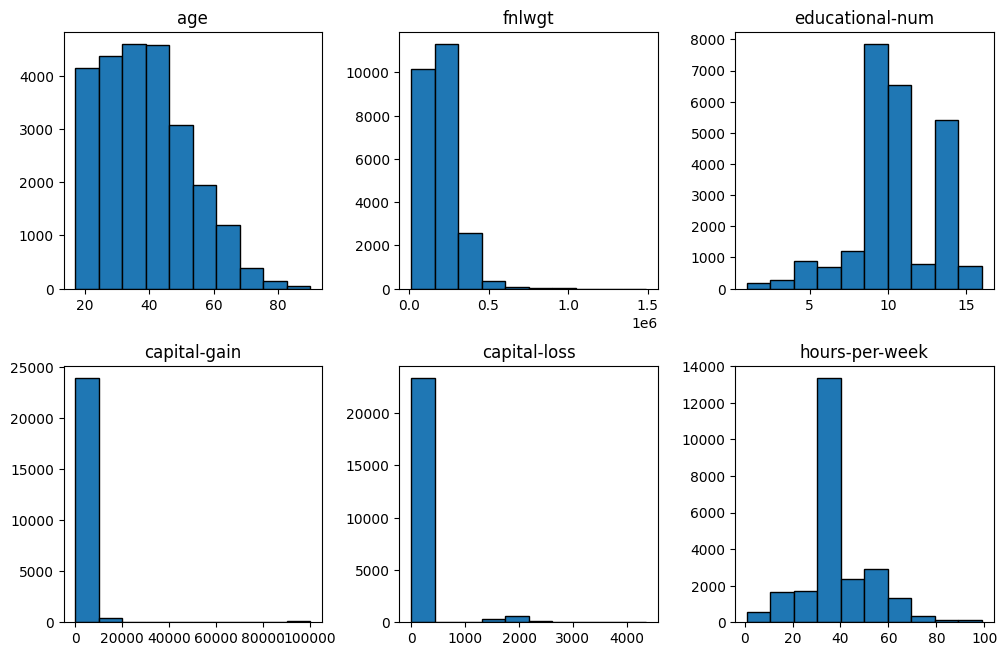

In [15]:
# Plotting Histogarms
pandas_df.hist(figsize=(12,12),layout=(3,3),sharex=False,edgecolor='black',grid=False)
plt.show()



These observations provide insights into various distributions:

1. **Age Distribution**: The histogram depicts most individuals aged between 20 and 60, with a smaller portion falling between 60 and 80 years old, and a scarcity of individuals under 20.

2. **Final Weight (fnlwgt) Distribution**: The histogram showcases a right-skewed distribution of fnlwgt values, with the majority falling between 0 and 200,000, along with a few outliers exceeding 200,000.

3. **Educational Number Distribution**: The graph illustrates a gradual increase in count until the sixth bar, peaking at 15,000, and gradually decreasing afterward, eventually reaching zero.

4. **Capital Gain Distribution**: This histogram reveals a left-skewed distribution of capital gains, with most data points under 20,000. There are a few outliers exceeding 100,000, and an anomalous data point at zero, potentially indicating an outlier or data entry error.

5. **Capital Loss Distribution**: The distribution of capital loss indicates that most observations fall below `$1,000`, with some between `$1,000` and `$2,000`, and one observation between `$3,000` and `$4,000`.

6. **Hours Per Week Distribution**: The histogram illustrates that the majority of individuals work between 40 and 60 hours per week, with fewer individuals working more or fewer hours.

## **Distribution Analysis from Box Plots**

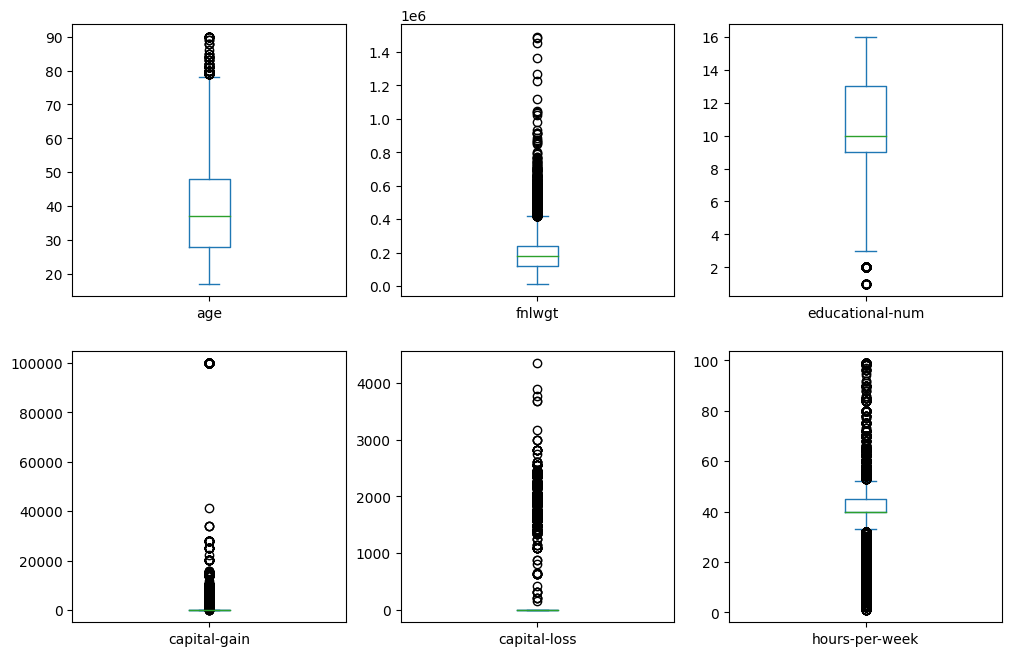

In [16]:
pandas_df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)
plt.show()

From these Box plots, these are the onservations we found:

 1. **Token Count per Doctor's Letter**
The box plot illustrates token counts per doctor's letter, with a median of 40 and outliers exceeding 80. There's a positive correlation between age and token count.

 2. **Final Weight (fnlwgt) Distribution**
The box plot for `fnlwgt` reveals a median of 30,000 and outliers surpassing 100,000.

 3. **Educational Number Distribution**
The box plot displays the distribution of `educational-num`, with a median of 10 and no outliers present.

 4. **Capital Gain Distribution**
Most capital gains cluster near zero, with one notable outlier showing a significantly higher gain.

 5. **Capital Loss Distribution**
The graph indicates most capital losses hover around `$0`, with some outliers reaching `$4,000`.

6. **Hours Per Week Distribution**
The box plot shows the distribution of weekly work hours, with a median of around 40 hours and outliers exceeding 100.


## The Knowledge produced through manual processed are as follows-

### **Education Vs Income**

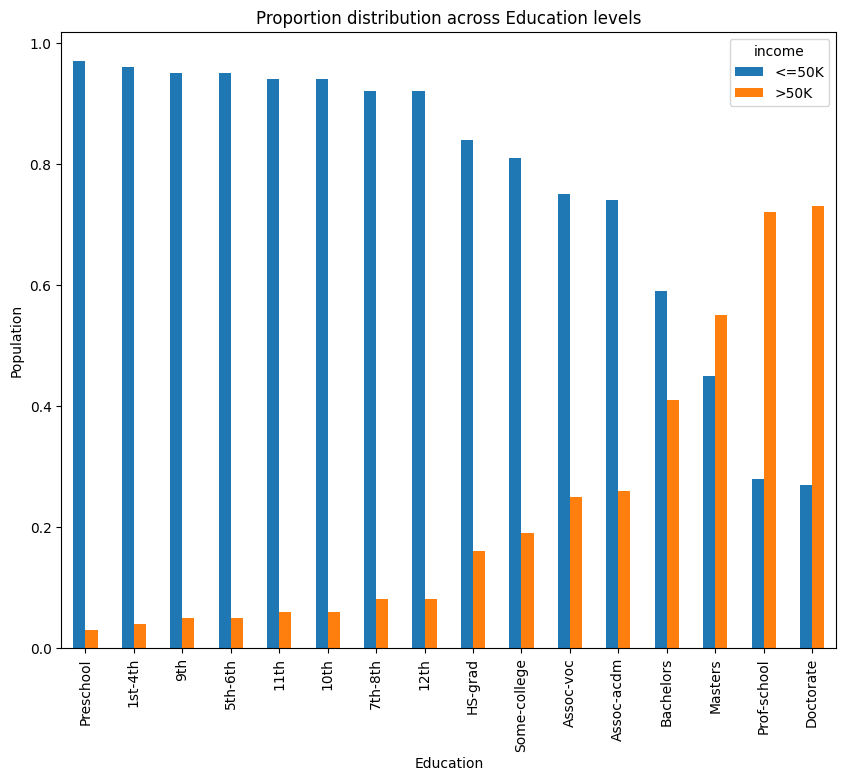

In [17]:
#Plotting Bar graph for education & Income
education = round(pd.crosstab(pandas_df.education, pandas_df.income).div(pd.crosstab(pandas_df.education, pandas_df.income).apply(sum,1),0),2)
education.sort_values(by = '>50K', inplace = True)
education.plot(kind ='bar', title = 'Proportion distribution across Education levels', figsize = (10,8))
plt.xlabel('Education')
plt.ylabel('Population')
plt.show()


We plotted a bar graph showing the proportion of income classes across education levels in the figure below. As one would expect, we observe from the bar graph that as education levels increase, the proportion of people who earn more than `$50k` a year also increases. It is interesting to note that only after a master's degree, the proportion of people earning more than `$50k` a year is a majority.


### **Gender Vs Income**

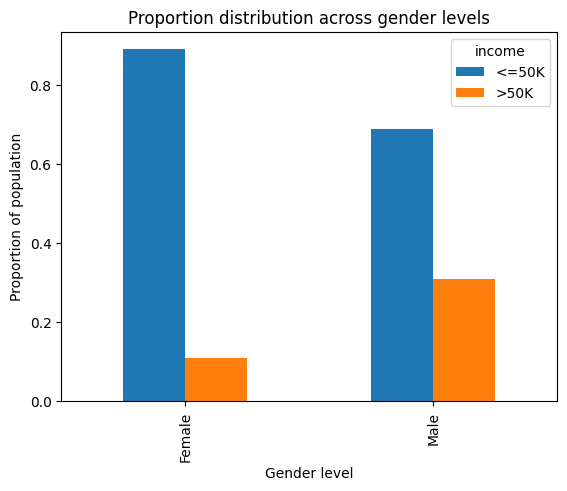

In [18]:
# Plotting Bar graph for Gender & Income
gender = round(pd.crosstab(pandas_df.gender, pandas_df.income).div(pd.crosstab(pandas_df.gender, pandas_df.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
plt.xlabel('Gender level')
plt.ylabel('Proportion of population')
plt.show()


We observed a graph depicting gender proportions based on income levels. Females dominate both income categories.

* Females with income ≤ 50k form the highest proportion.
* Males with income > 50k rank second.
* Females with income > 50k follow.
* Males with income ≤ 50k are the minority.


### **Occupation Level Vs Income**

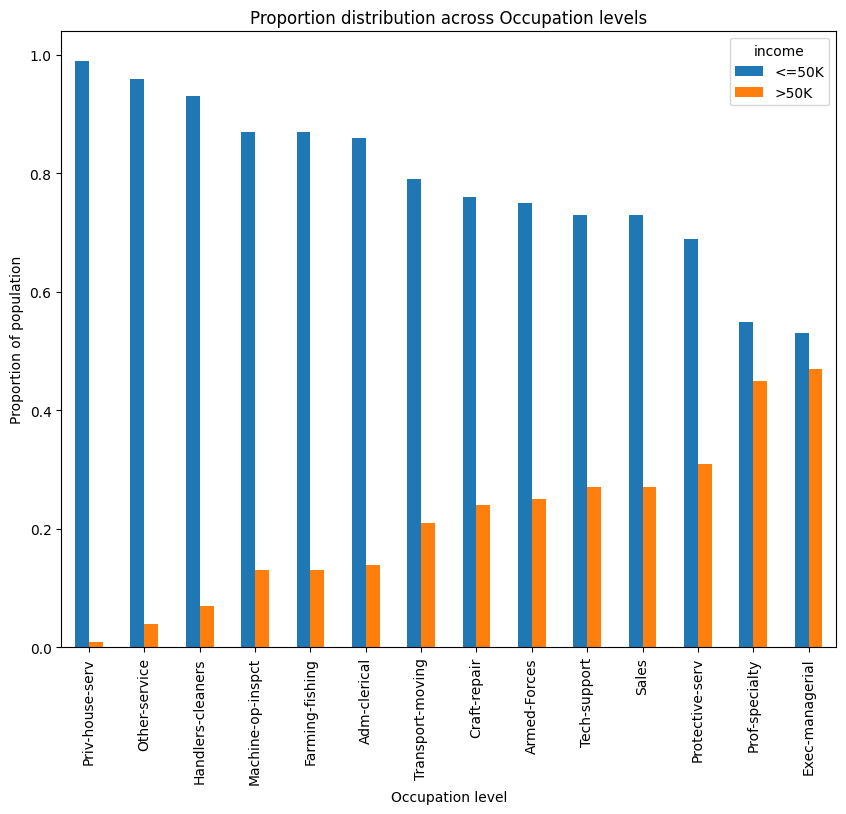

In [19]:
# Plotting bar graph for Occupation & Income
occupation = round(pd.crosstab(pandas_df.occupation, pandas_df.income).div(pd.crosstab(pandas_df.occupation, pandas_df.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
plt.xlabel('Occupation level')
plt.ylabel('Proportion of population')
plt.show()


The graph illustrates the population proportion by occupation level and income. Blue bars denote ≤ `$50k`, while orange bars denote > `$50k`. Majority earn ≤ `$50k` in private house service, other service, handlers, cleaners, etc., farming, fishing, forestry, administrative, clerical, etc., transport, moving, craft, repair, and sales. Majority earn > `$50k` in protective service, armed forces, professional specialty, and executive, managerial roles. Proportion earning > `$50k` increases with occupation level.


### **Native-Country Vs Income**

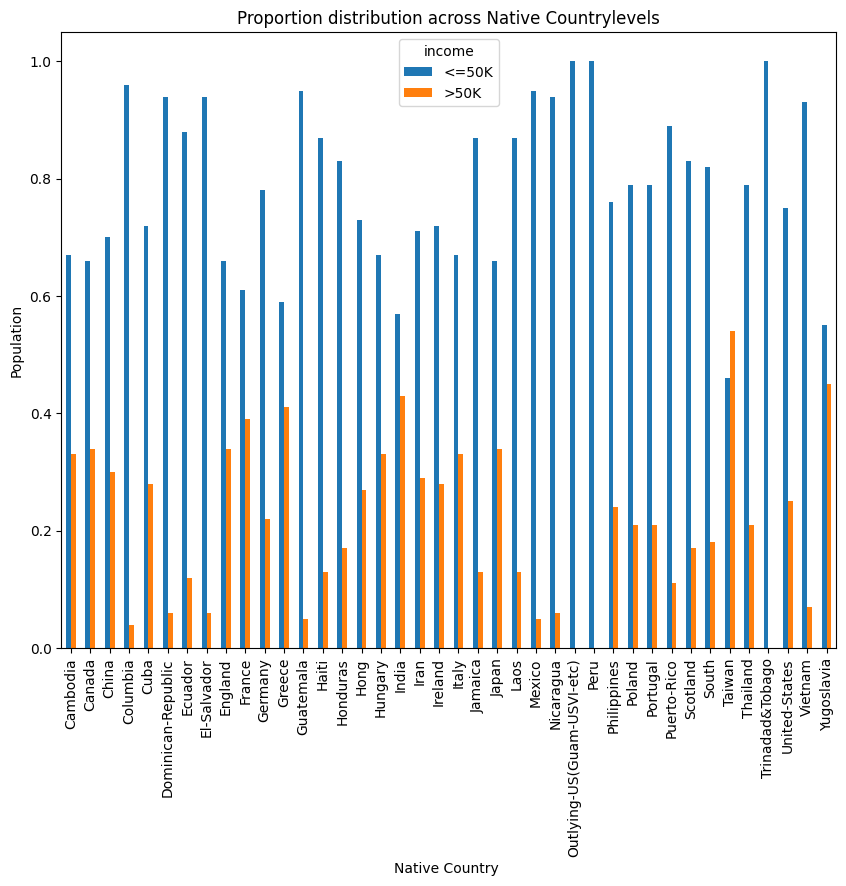

In [20]:
# Plotting Bar Graph for Native Country & income
native_country = round(pd.crosstab(pandas_df['native-country'], pandas_df.income).div(pd.crosstab(pandas_df['native-country'], pandas_df.income).apply(sum,1),0),2)
native_country.plot(kind ='bar', title = 'Proportion distribution across Native Countrylevels', figsize = (10,8))
plt.xlabel('Native Country ')
plt.ylabel('Population')
plt.show()



The graph illustrates income proportions across countries, with most having a higher percentage of earners making ≤ `$50k`. Cambodia, Laos, and Vietnam have the highest proportions in this category, while the United States, Canada, and Switzerland have the lowest. Developed nations generally have more earners making > `$50k`, with many countries showing an upward trend in this bracket. Governments need policies to tackle inequality and social issues, with options like tax reforms, education/training investments, and strengthening social safety nets.


### **Income Distribution Comparison**

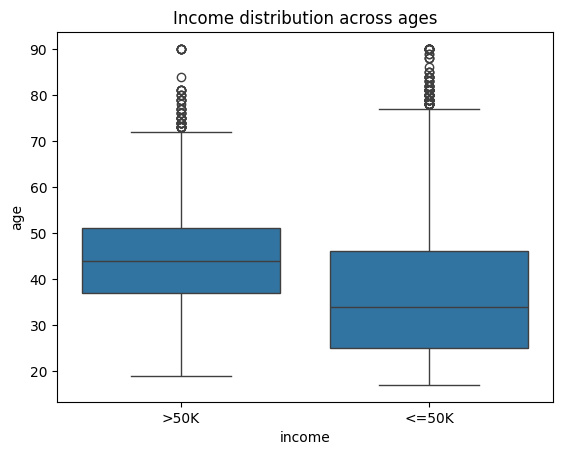

In [21]:
sns.boxplot(y="age",x="income",data=pandas_df)
plt.title("Income distribution across ages")
plt.show()

This image shows a box plot comparing the income distribution of people below 50k and above 50k. The median income for people below 50k is around 35k, while the median income for people above 50k is around 70k. There is a wider range of incomes for people above 50k, with some people earning over 100k.

In conclusion, the people above 50K tend to have higher income than those below 50K.

### **Education Distribution**

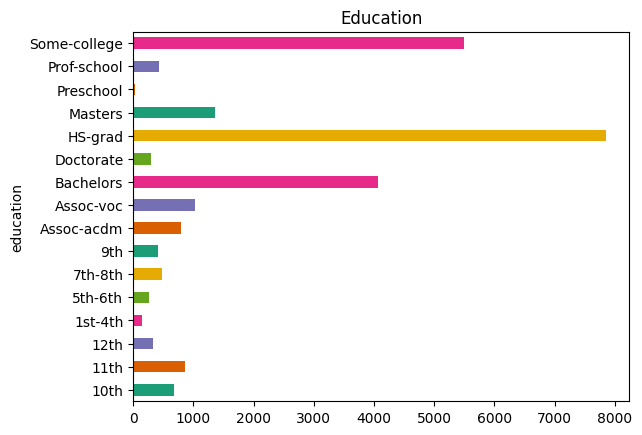

In [22]:
# plotting education
pandas_df.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Education")
plt.show()

The graph shows the number of people in the US with different levels of education. The x-axis shows the level of education, and the y-axis shows the number of people.

The most common level of education is high school graduate, with over 15,000 people. The second most common level of education is some college, with over 10,000 people. The third most common level of education is bachelor's degree, with over 8,000 people.

The least common levels of education are doctorate degree, with less than 1,000 people, and associate's degree, with less than 2,000 people.


### **Marital Status Distribution**


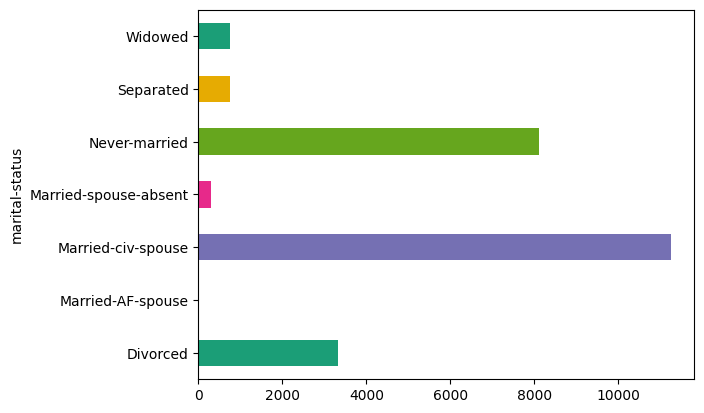

In [23]:
# plotting martial status of an adult
pandas_df.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

The chart illustrates the distribution of individuals across different marital statuses. The largest group consists of never-married individuals, indicating a significant portion of the population has not married. Married-civ-spouse is the most common marital category, while widowed individuals outnumber divorced individuals. Separated individuals exceed those with a spouse absent. Surprisingly, married-AF-spouse exceeds the number of widowed individuals, suggesting a notable presence of individuals married to members of the Armed Forces. Overall, the chart provides insights into the diverse marital landscape, reflecting variations in relationship statuses among the population.

### **Employment in Different Occupations**

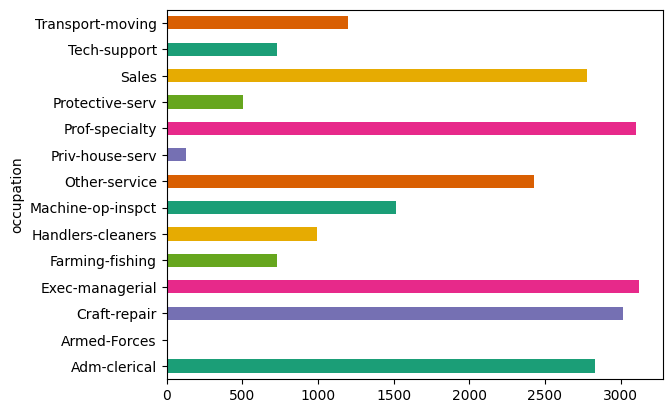

In [24]:
# plotting occupations of adults
pandas_df.groupby('occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()



The graph presents employment numbers across various occupations, listed from most to least employed. Key occupations include Prof-specialty, Exec-managerial, Sales, Adm-clerical, Transport-moving, Craft-repair, Protective-serv, Machine-op-inspct, Other-service, Tech-support, Handlers-cleaners, Priv-house-serv, Farming-fishing, and Armed-forces.


### **Gender Vs Working Hours**

In [25]:
pd.crosstab(pandas_df["gender"],pandas_df["hours-per-week"])

hours-per-week,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,94,95,96,97,98,99
gender,,,,,,,,,,,,,,,,,,,,,
Female,6,12,11,23,23,22,13,60,7,106,...,0,2,0,0,0,0,0,0,0,16
Male,9,13,14,22,22,17,9,50,5,107,...,2,18,1,2,1,1,6,1,7,62


### **Relationship between Age and Working Hours**

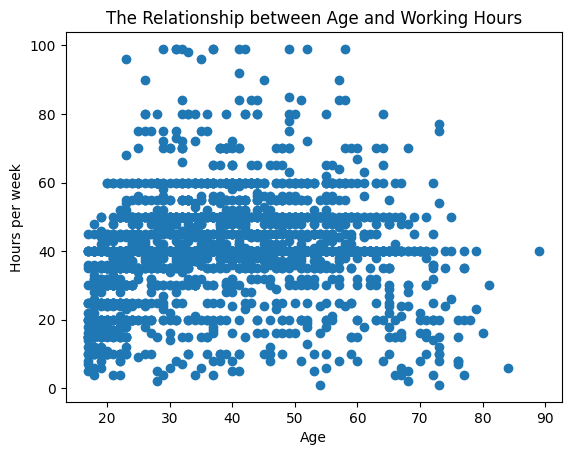

In [26]:
# Scatter plot the people of the Age and number of working hours per week
fig , ax = plt.subplots()
ax.scatter(pandas_df.age[:3000], pandas_df["hours-per-week"][:3000])
ax.set_xlabel("Age")
ax.set_ylabel("Hours per week")
plt.title("The Relationship between Age and Working Hours")
plt.show()



The graph illustrates the relationship between age and working hours per week. Each dot represents a data point, showing a general trend of decreasing working hours with increasing age, likely due to nearing retirement. However, outliers exist, with some older individuals working long hours and many young people working part-time or not at all.


In [27]:
pd.crosstab(pandas_df.workclass, pandas_df.income)

income,<=50K,>50K
workclass,,
Federal-gov,428,279
Local-gov,1150,465
Never-worked,5,0
Private,13247,3745
Self-emp-inc,390,480
Self-emp-not-inc,1351,548
State-gov,741,268
Without-pay,3,0


### **Income Distribution Across Different Work Classes**








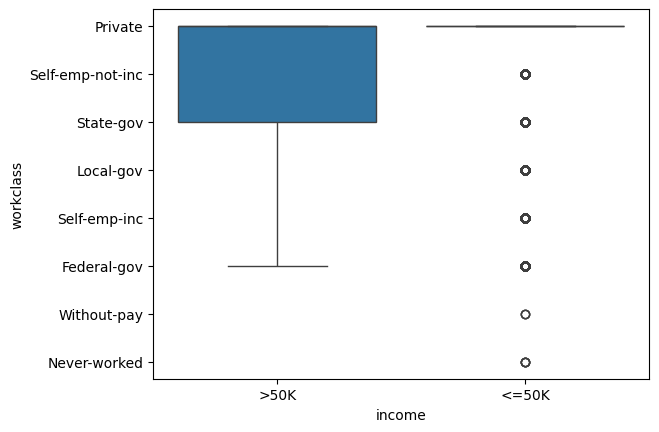

In [28]:
sns.boxplot(x="income",y="workclass",data=pandas_df)
plt.show()

This box plot illustrates the distribution of income across different work classes. It shows that the majority of individuals in the Private sector earn over 50K, with a wide range of incomes indicated by the box plot's spread. In contrast, other work classes such as Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, and Never-worked predominantly fall in the <=50K income category. There are several outliers in the <=50K income category across various work classes, highlighting some exceptions to the general trend. Overall, the data suggests a significant concentration of higher incomes in the Private sector compared to other work classes.








# **Data Transformation and Feature Engineering**

In this phase, we employed various techniques for data transformation and feature engineering to enhance the quality and suitability of our dataset for machine learning tasks.

---

### **Feature Scaling with StandardScaler**

We applied feature scaling using the `StandardScaler` from scikit-learn to standardize the numerical features in our dataset. This technique transforms the data such that the mean is 0 and the standard deviation is 1, ensuring that all features have the same scale. This step is crucial for algorithms that are sensitive to the scale of features, such as linear models and neural networks.

### **Encoding Categorical Data with One-Hot Encoding**

Next, we tackled categorical variables by employing one-hot encoding. This technique transforms categorical variables into a numerical format suitable for machine learning algorithms. We utilized the `OneHotEncoder` from scikit-learn to convert categorical variables into binary vectors, with each category represented by a binary column. We opted for dropping the first column to avoid multicollinearity issues.

After encoding the categorical variables, we concatenated the encoded data with the original dataset and dropped the original categorical columns. This resulted in a final dataset with numerical features only, ready for further analysis and modeling.

---

**Tools Used**

- **StandardScaler**: Employed for feature scaling to standardize numerical features.
- **OneHotEncoder**: Utilized for one-hot encoding of categorical variables, transforming them into binary vectors.


In [42]:
# Identifying and Removing Outliers

from pyspark.sql.functions import col, mean, stddev, abs as abs_col
from pyspark.sql.types import IntegerType, FloatType, DoubleType


numerical_columns = [field.name for field in new_df_pyspark.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]

threshold = 3
outliers_condition = None

for c in numerical_columns:
    mean_val = new_df_pyspark.select(mean(col(c))).first()[0]
    stddev_val = new_df_pyspark.select(stddev(col(c))).first()[0]
    z_score_col = (col(c) - mean_val) / stddev_val
    current_condition = abs_col(z_score_col) > threshold

    if outliers_condition is None:
        outliers_condition = current_condition
    else:
        outliers_condition = outliers_condition | current_condition

df_cleaned = new_df_pyspark.filter(~outliers_condition)

df_cleaned_shape = (df_cleaned.count(), len(df_cleaned.columns))
print(df_cleaned_shape)


(44717, 15)


In [43]:
df_cleaned.show(5)

+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|   education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
| 25|  Private|226802|        11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|
| 38|  Private| 89814|     HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|           0|           0|            50| United-States| <=50K|
| 28|Local-gov|336951|  Assoc-acdm|             12|Married-civ-spouse|  Protective-serv|     Husband|White|  M

In [44]:
# Feature Scaling

from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType, DoubleType,ArrayType

numerical_columns = [field.name for field in df_cleaned.schema.fields if field.dataType in [IntegerType(), FloatType(), DoubleType()]]

assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
assembled_df = assembler.transform(df_cleaned)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

def extract_vector(vector):
    return vector.toArray().tolist()

extract_vector_udf = udf(extract_vector, ArrayType(DoubleType()))

for i, col_name in enumerate(numerical_columns):
    scaled_df = scaled_df.withColumn(col_name + "_scaled", extract_vector_udf(col("scaled_features"))[i])


scaled_columns = [col_name + "_scaled" for col_name in numerical_columns]
scaled_df = scaled_df.select(scaled_columns)

for col_name in numerical_columns:
    scaled_df = scaled_df.withColumnRenamed(col_name + "_scaled", col_name)

normalized_description = scaled_df.describe().select("summary", *numerical_columns)
normalized_description.show()


+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                age|              fnlwgt|     educational-num|        capital-gain|        capital-loss|      hours-per-week|
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  count|              44717|               44717|               44717|               44717|               44717|               44717|
|   mean|2.5724108558132E-14|-3.76504069775513...|-2.06793183953723...|1.810380804177545...|1.872211862176215...|1.931722005484020...|
| stddev| 1.0000000000000022|  1.0000000000000022|  0.9999999999999968|  1.0000000000000053|  1.0000000000000062|   0.999999999999995|
|    min|-1.5774630211170109| -1.8241783471875606|  -2.886744293854078|-0.24294311719228537|-0.03513084753394091|  -3.212550693774422|
|    max| 3.0387520061288913|  3.3922308595293456|  2.4

In [45]:
scaled_df.show(5)

+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|                 age|             fnlwgt|     educational-num|        capital-gain|        capital-loss|      hours-per-week|
+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
| -0.9818223724401204| 0.4403287646007196| -1.2548598829041187|-0.24294311719228537|-0.03513084753394091|0.013070299974316184|
|-0.01390631834017...|-1.0057584929576693| -0.4389176774291391|-0.24294311719228537|-0.03513084753394091|  0.9090761315711879|
| -0.7584571291862864| 1.6030953232248253|  0.7849956307833303|-0.24294311719228537|-0.03513084753394091|0.013070299974316184|
|  0.4328241681674948|-0.2614439074232835|-0.03094657469164...|  3.1027794473510673|-0.03513084753394091|0.013070299974316184|
| -1.5030079400323997|-0.8613165568379257|-0.03094657469164...|-0.24294311719228537|-0.03513084753394091| -0.88

In [46]:
new_df_cleaned=df_cleaned.toPandas()

In [47]:
new_df_cleaned

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44712,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
44713,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
44714,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
44715,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_columns = new_df_cleaned.select_dtypes(include=[object]).columns

encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(new_df_cleaned[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

df_final = new_df_cleaned.drop(columns=categorical_columns)
df_final = pd.concat([df_final, encoded_categorical_df], axis=1)

df_final_shape = df_final.shape
df_final_shape


(44717, 95)

In [49]:
df_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38,89814,9,0,0,50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28,336951,12,0,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,44,160323,10,7688,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,18,103497,10,0,0,30,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44712,27,257302,12,0,0,38,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44713,40,154374,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
44714,58,151910,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44715,22,201490,9,0,0,20,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#**Correlation Analysis**:

Correlation heatmaps were generated before and after dropping columns with low correlation to the income variable. The initial heatmap provided a comprehensive view of relationships between all features and the target variable. Columns with a correlation threshold below 0.1 were dropped to simplify the model and focus on the most impactful features.


In [50]:
df_final.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
age,1.000000,-0.075629,0.038610,0.128385,0.018115,0.092199,0.063922,-0.020363,-0.190847,0.094092,...,0.006055,0.013839,-0.002950,-0.010910,-0.002753,0.001978,0.014196,-0.013228,0.003596,0.236095
fnlwgt,-0.075629,1.000000,-0.034462,-0.000517,-0.001714,-0.010617,0.005452,0.004728,0.041140,-0.015134,...,0.009841,-0.006553,-0.011472,-0.000944,-0.002548,0.001650,-0.071946,-0.004960,0.002755,-0.003464
educational-num,0.038610,-0.034462,1.000000,0.152519,0.008824,0.149424,0.102832,-0.015717,-0.170031,0.069869,...,-0.038690,0.001014,0.014759,0.048823,0.009851,-0.009777,0.087577,-0.002386,-0.004801,0.316357
capital-gain,0.128385,-0.000517,0.152519,1.000000,-0.008535,0.096606,0.005299,-0.003633,-0.052214,0.084636,...,-0.005030,-0.002940,-0.000853,-0.001546,-0.002913,-0.004312,0.012865,0.001391,0.003860,0.339828
capital-loss,0.018115,-0.001714,0.008824,-0.008535,1.000000,0.000665,0.008857,-0.000525,-0.008901,0.001281,...,0.005067,-0.000761,-0.001663,-0.001266,-0.000847,-0.000814,-0.001323,-0.001459,-0.000779,-0.016538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Trinadad&Tobago,0.001978,0.001650,-0.009777,-0.004312,-0.000814,-0.002293,0.001756,-0.000347,-0.002635,0.006901,...,-0.001419,-0.000502,-0.001097,-0.000835,-0.000559,1.000000,-0.077788,-0.000962,-0.000514,-0.010045
native-country_United-States,0.014196,-0.071946,0.087577,0.012865,-0.001323,0.007303,0.031503,0.004455,-0.041812,0.003957,...,-0.205522,-0.072761,-0.158918,-0.120972,-0.080966,-0.077788,1.000000,-0.139414,-0.074474,0.029566
native-country_Vietnam,-0.013228,-0.004960,-0.002386,0.001391,-0.001459,-0.006417,-0.004345,-0.000621,0.008432,-0.004385,...,-0.002543,-0.000900,-0.001966,-0.001497,-0.001002,-0.000962,-0.139414,1.000000,-0.000921,-0.013081
native-country_Yugoslavia,0.003596,0.002755,-0.004801,0.003860,-0.000779,0.000742,-0.001735,-0.000332,-0.001543,0.001788,...,-0.001358,-0.000481,-0.001050,-0.000800,-0.000535,-0.000514,-0.074474,-0.000921,1.000000,0.007578


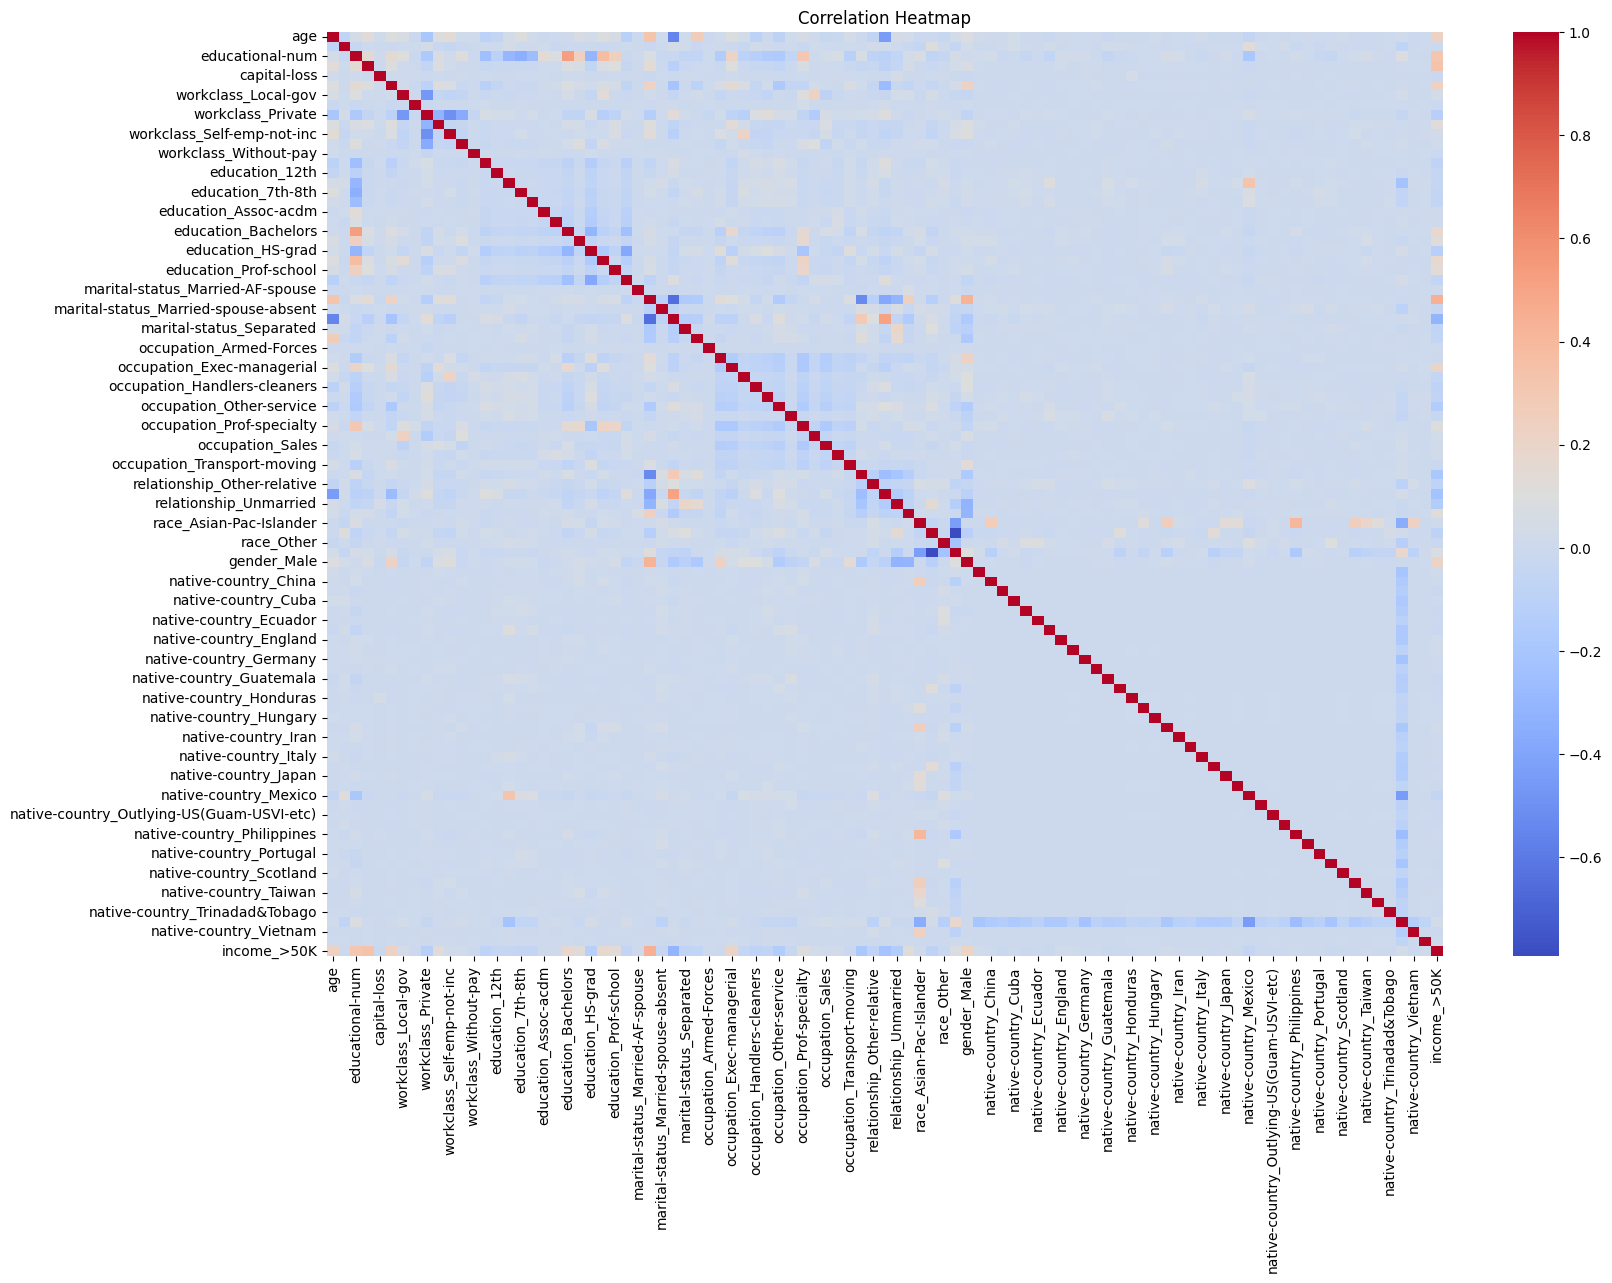

In [51]:
# Generate correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df_final.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [52]:
# generating heatmap after dropping columns
correlations = df_final.corr()["income_>50K"].abs()
threshold = 0.1
drop_cols = correlations[correlations<threshold].index
df_dropped = df_final.drop(drop_cols, axis=1)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44717 entries, 0 to 44716
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                44717 non-null  int32  
 1   educational-num                    44717 non-null  int32  
 2   capital-gain                       44717 non-null  int32  
 3   hours-per-week                     44717 non-null  int32  
 4   workclass_Private                  44717 non-null  float64
 5   workclass_Self-emp-inc             44717 non-null  float64
 6   education_Bachelors                44717 non-null  float64
 7   education_Doctorate                44717 non-null  float64
 8   education_HS-grad                  44717 non-null  float64
 9   education_Masters                  44717 non-null  float64
 10  education_Prof-school              44717 non-null  float64
 11  marital-status_Married-civ-spouse  44717 non-null  flo

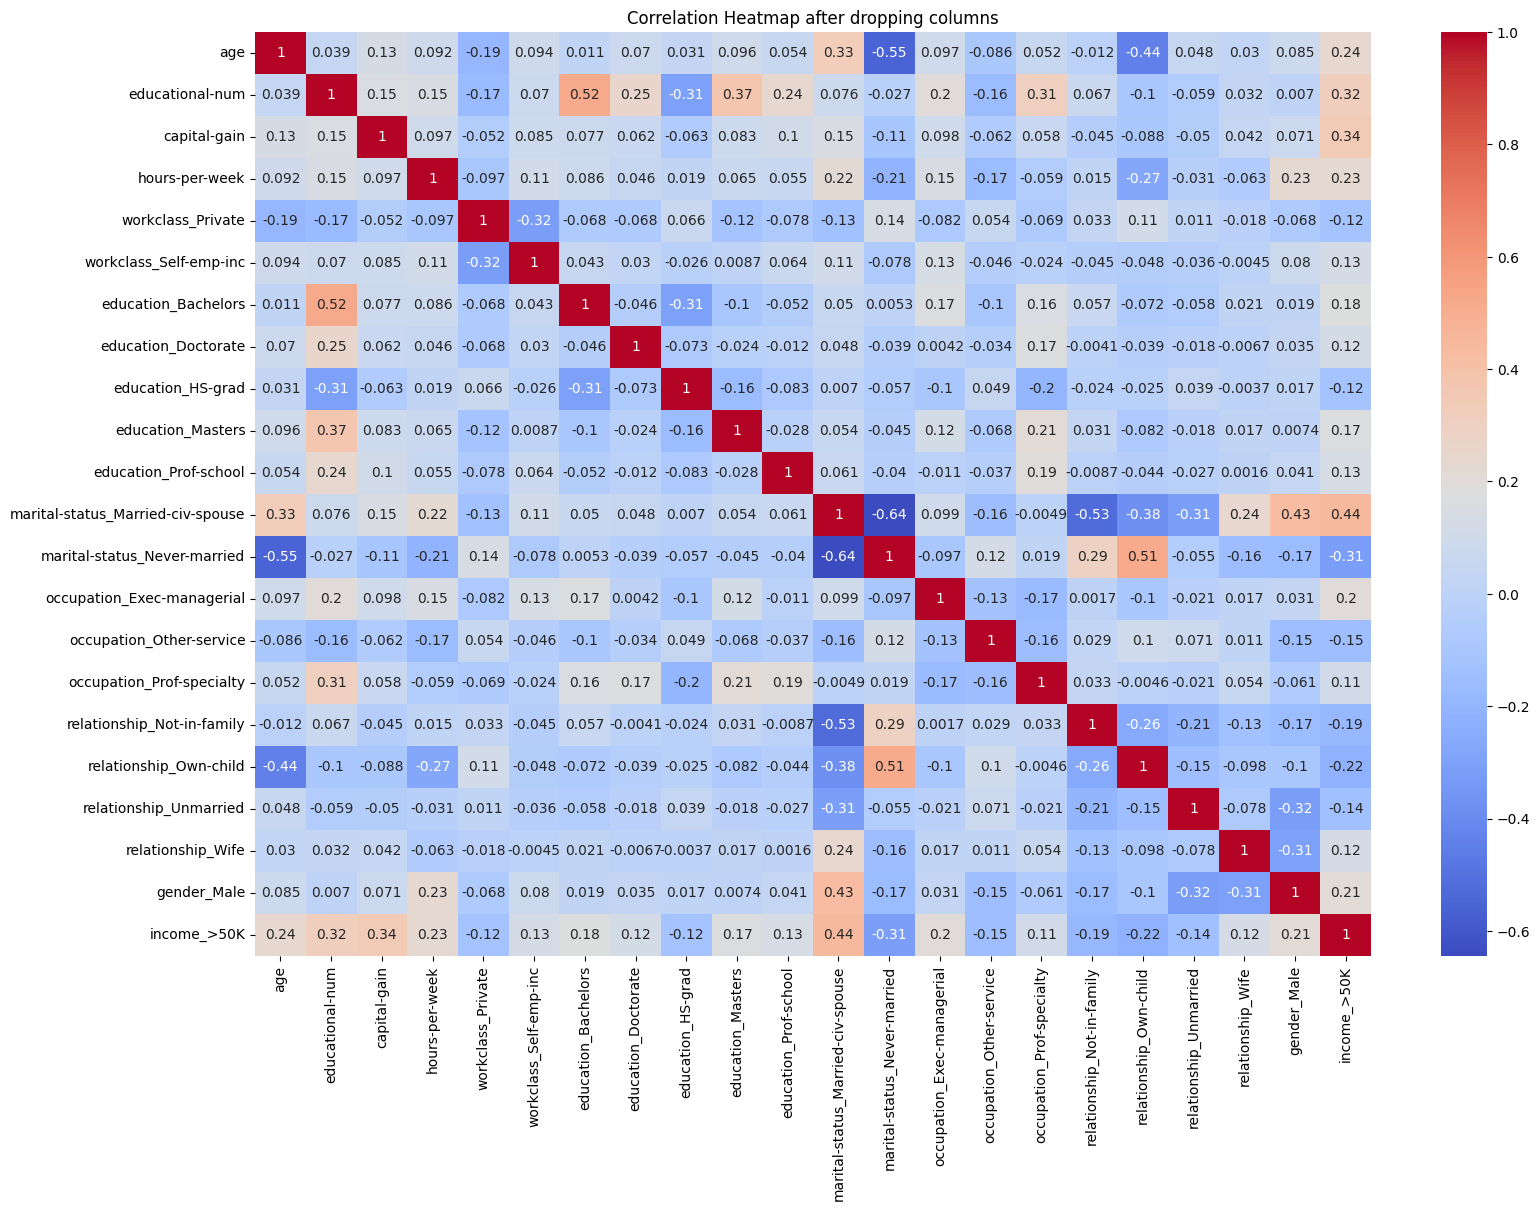

In [53]:
# Generate correlation heatmap after dropping
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after dropping columns')
plt.show()

# **Model Training & Evaluation**

In [54]:
X= df_dropped.iloc[:,:-1].values
Y= df_dropped.iloc[:,-1].values

In [55]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

## **Random Forests**

A Random Forest Classifier is an ensemble learning method used for classification tasks. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (for classification) of the individual trees.

In [43]:
import pickle
# set random seed
np.random.seed(42)

# creating a hyper parameter grid:
rf_grid = { "n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2),
            "n_jobs":[-1],
            "random_state":[42]}

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Setup random hyperparameter search for Randomised forest classifier
from sklearn.model_selection import RandomizedSearchCV

rs_random_forest=RandomizedSearchCV(model,
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#Fit random hyperparameter search model for random forest classifier
rs_random_forest.fit(X_train,Y_train)

print("Best Parameters:", rs_random_forest.best_params_)
print("Best Score:", rs_random_forest.best_score_)

best_rs_classifier = rs_random_forest.best_estimator_ # finding the best estimator

# Save the model to a file using pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rs_classifier, file)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'random_state': 42, 'n_jobs': -1, 'n_estimators': 310, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_depth': None}
Best Score: 0.8570629891912038


In [44]:
best_rs_classifier.score(X_test,Y_test)

0.860912343470483

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Scores on training data
X_train_prediction = best_rs_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
training_precision = precision_score(Y_train, X_train_prediction)
training_recall = recall_score(Y_train, X_train_prediction)
training_f1_score = f1_score(Y_train, X_train_prediction)

print("Training Data Metrics:")
print("Accuracy Score on Training Data:", training_data_accuracy)
print("Precision on Training Data:", training_precision)
print("Recall on Training Data:", training_recall)
print("F1-score on Training Data:", training_f1_score)

# Confusion matrix on training data
training_conf_matrix = confusion_matrix(Y_train, X_train_prediction)
print("Confusion Matrix on Training Data:\n", training_conf_matrix)

# Scores on validation data

X_valid_prediction = best_rs_classifier.predict(X_valid)
validation_data_accuracy = accuracy_score(Y_valid, X_valid_prediction)
validation_precision = precision_score(Y_valid, X_valid_prediction)
validation_recall = recall_score(Y_valid, X_valid_prediction)
validation_f1_score = f1_score(Y_valid, X_valid_prediction)

print("\nValidation Data Metrics:")
print("Accuracy Score on Validation Data:", validation_data_accuracy)
print("Precision on Validation Data:", validation_precision)
print("Recall on Validation Data:", validation_recall)
print("F1-score on Validation Data:", validation_f1_score)

# Confusion matrix on validation data
validation_conf_matrix = confusion_matrix(Y_valid, X_valid_prediction)
print("Confusion Matrix on Validation Data:\n", validation_conf_matrix)

# Scores on test data
X_test_prediction = best_rs_classifier.predict(X_test)

testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
testing_precision = precision_score(Y_test, X_test_prediction)
testing_recall = recall_score(Y_test, X_test_prediction)
testing_f1_score = f1_score(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print("\nAccuracy Score on Test Data:", testing_data_accuracy)
print("Precision on Test Data:", testing_precision)
print("Recall on Test Data:", testing_recall)
print("F1-score on Test Data:", testing_f1_score)

# Confusion matrix on test data
testing_conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix on Test Data:\n", testing_conf_matrix)


Training Data Metrics:
Accuracy Score on Training Data: 0.873984345881476
Precision on Training Data: 0.7885650224215247
Recall on Training Data: 0.5905961376994122
F1-score on Training Data: 0.6753720595295247
Confusion Matrix on Training Data:
 [[19932   943]
 [ 2438  3517]]

Validation Data Metrics:
Accuracy Score on Validation Data: 0.857989488985799
Precision on Validation Data: 0.7456724367509987
Recall on Validation Data: 0.5577689243027888
F1-score on Validation Data: 0.6381766381766381
Confusion Matrix on Validation Data:
 [[6553  382]
 [ 888 1120]]

Test Data Metrics:

Accuracy Score on Test Data: 0.860912343470483
Precision on Test Data: 0.7555875991348233
Recall on Test Data: 0.536610343061956
F1-score on Test Data: 0.6275449101796408
Confusion Matrix on Test Data:
 [[6652  339]
 [ 905 1048]]


## **Support Vector Machine(SVM)**

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the SVC model
svc = SVC()
svc_model = svc.fit(X_train, Y_train)

# Scores on training data
X_train_prediction = svc_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
training_precision = precision_score(Y_train, X_train_prediction)
training_recall = recall_score(Y_train, X_train_prediction)
training_f1_score = f1_score(Y_train, X_train_prediction)
training_conf_matrix = confusion_matrix(Y_train, X_train_prediction)

print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.4f}")
print(f"Precision: {training_precision:.4f}")
print(f"Recall: {training_recall:.4f}")
print(f"F1-score: {training_f1_score:.4f}")
print("Confusion Matrix:")
print(training_conf_matrix)

# Scores on validation data
X_valid_prediction = svc_model.predict(X_valid)
validation_data_accuracy = accuracy_score(Y_valid, X_valid_prediction)
validation_precision = precision_score(Y_valid, X_valid_prediction)
validation_recall = recall_score(Y_valid, X_valid_prediction)
validation_f1_score = f1_score(Y_valid, X_valid_prediction)
validation_conf_matrix = confusion_matrix(Y_valid, X_valid_prediction)

print("\nValidation Data Metrics:")
print(f"Accuracy: {validation_data_accuracy:.4f}")
print(f"Precision: {validation_precision:.4f}")
print(f"Recall: {validation_recall:.4f}")
print(f"F1-score: {validation_f1_score:.4f}")
print("Confusion Matrix:")
print(validation_conf_matrix)

# Scores on test data
X_test_prediction = svc_model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
testing_precision = precision_score(Y_test, X_test_prediction)
testing_recall = recall_score(Y_test, X_test_prediction)
testing_f1_score = f1_score(Y_test, X_test_prediction)
testing_conf_matrix = confusion_matrix(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print(f"Accuracy: {testing_data_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")
print("Confusion Matrix:")
print(testing_conf_matrix)


Training Data Metrics:
Accuracy: 0.8130
Precision: 0.9408
Recall: 0.1681
F1-score: 0.2852
Confusion Matrix:
[[20812    63]
 [ 4954  1001]]

Validation Data Metrics:
Accuracy: 0.8115
Precision: 0.9305
Recall: 0.1733
F1-score: 0.2922
Confusion Matrix:
[[6909   26]
 [1660  348]]

Test Data Metrics:
Accuracy: 0.8171
Precision: 0.9415
Recall: 0.1731
F1-score: 0.2924
Confusion Matrix:
[[6970   21]
 [1615  338]]


In [57]:
import pickle
model_filename = 'svc_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(svc_model, file)


## **Xg Boost Classifier**

In [47]:
import pickle
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
param_dist = {
    'n_estimators': randint(100,200, 300),
    'learning_rate': uniform(0.01,0.2),
    'max_depth': randint(3, 6,9),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.2),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(1, 1)
}
#Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=25, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

best_xgb_classifier = random_search.best_estimator_


# Save the best estimator to a file using pickle
import pickle
model_filename = 'xgb_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb_classifier, file)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train_prediction = best_xgb_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
training_precision = precision_score(Y_train, X_train_prediction)
training_recall = recall_score(Y_train, X_train_prediction)
training_f1_score = f1_score(Y_train, X_train_prediction)
training_conf_matrix = confusion_matrix(Y_train, X_train_prediction)

print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.4f}")
print(f"Precision: {training_precision:.4f}")
print(f"Recall: {training_recall:.4f}")
print(f"F1-score: {training_f1_score:.4f}")
print("Confusion Matrix:")
print(training_conf_matrix)

# Scores on validation data
X_valid_prediction = best_xgb_classifier.predict(X_valid)
validation_data_accuracy = accuracy_score(Y_valid, X_valid_prediction)
validation_precision = precision_score(Y_valid, X_valid_prediction)
validation_recall = recall_score(Y_valid, X_valid_prediction)
validation_f1_score = f1_score(Y_valid, X_valid_prediction)
validation_conf_matrix = confusion_matrix(Y_valid, X_valid_prediction)

print("\nValidation Data Metrics:")
print(f"Accuracy: {validation_data_accuracy:.4f}")
print(f"Precision: {validation_precision:.4f}")
print(f"Recall: {validation_recall:.4f}")
print(f"F1-score: {validation_f1_score:.4f}")
print("Confusion Matrix:")
print(validation_conf_matrix)

# Scores on test data
X_test_prediction = best_xgb_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
testing_precision = precision_score(Y_test, X_test_prediction)
testing_recall = recall_score(Y_test, X_test_prediction)
testing_f1_score = f1_score(Y_test, X_test_prediction)
testing_conf_matrix = confusion_matrix(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print(f"Accuracy: {testing_data_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")
print("Confusion Matrix:")
print(testing_conf_matrix)


Training Data Metrics:
Accuracy: 0.8978
Precision: 0.8243
Recall: 0.6860
F1-score: 0.7488
Confusion Matrix:
[[20004   871]
 [ 1870  4085]]

Validation Data Metrics:
Accuracy: 0.8604
Precision: 0.7320
Recall: 0.5971
F1-score: 0.6577
Confusion Matrix:
[[6496  439]
 [ 809 1199]]

Test Data Metrics:
Accuracy: 0.8627
Precision: 0.7337
Recall: 0.5827
F1-score: 0.6495
Confusion Matrix:
[[6578  413]
 [ 815 1138]]


## **Adaboost Classifier**

In [49]:
import pickle
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

estimator = DecisionTreeClassifier() # taking base estimator as Decison Tree
ada_model = AdaBoostClassifier(estimator=estimator)
param_dist_ada = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0),
    'base_estimator__max_depth': randint(1, 10)
}
# Randomized Search
random_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_dist_ada, n_iter=25, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)
best_adaboost_classifier = random_search.best_estimator_

# Save the best estimator to a file using pickle
model_filename = 'adaboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_adaboost_classifier, file)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Scores on training data
X_train_prediction = best_adaboost_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
training_precision = precision_score(Y_train, X_train_prediction)
training_recall = recall_score(Y_train, X_train_prediction)
training_f1_score = f1_score(Y_train, X_train_prediction)
training_conf_matrix = confusion_matrix(Y_train, X_train_prediction)

print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.4f}")
print(f"Precision: {training_precision:.4f}")
print(f"Recall: {training_recall:.4f}")
print(f"F1-score: {training_f1_score:.4f}")
print("Confusion Matrix:")
print(training_conf_matrix)

# Scores on validation data
X_valid_prediction = best_adaboost_classifier.predict(X_valid)
validation_data_accuracy = accuracy_score(Y_valid, X_valid_prediction)
validation_precision = precision_score(Y_valid, X_valid_prediction)
validation_recall = recall_score(Y_valid, X_valid_prediction)
validation_f1_score = f1_score(Y_valid, X_valid_prediction)
validation_conf_matrix = confusion_matrix(Y_valid, X_valid_prediction)

print("\nValidation Data Metrics:")
print(f"Accuracy: {validation_data_accuracy:.4f}")
print(f"Precision: {validation_precision:.4f}")
print(f"Recall: {validation_recall:.4f}")
print(f"F1-score: {validation_f1_score:.4f}")
print("Confusion Matrix:")
print(validation_conf_matrix)

# Scores on test data
X_test_prediction = best_adaboost_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
testing_precision = precision_score(Y_test, X_test_prediction)
testing_recall = recall_score(Y_test, X_test_prediction)
testing_f1_score = f1_score(Y_test, X_test_prediction)
testing_conf_matrix = confusion_matrix(Y_test, X_test_prediction)

print("\nTest Data Metrics:")
print(f"Accuracy: {testing_data_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")
print("Confusion Matrix:")
print(testing_conf_matrix)


Training Data Metrics:
Accuracy: 0.8681
Precision: 0.7528
Recall: 0.6039
F1-score: 0.6701
Confusion Matrix:
[[19694  1181]
 [ 2359  3596]]

Validation Data Metrics:
Accuracy: 0.8647
Precision: 0.7506
Recall: 0.5951
F1-score: 0.6639
Confusion Matrix:
[[6538  397]
 [ 813 1195]]

Test Data Metrics:
Accuracy: 0.8675
Precision: 0.7543
Recall: 0.5832
F1-score: 0.6578
Confusion Matrix:
[[6620  371]
 [ 814 1139]]


## **Logistic Regression Model**
In this section, we will implement a logistic regression model to predict whether an individual's income exceeds $50K/year based on the given features. The steps involved are:

1. **Data Preprocessing:** Handle missing values, encode categorical variables, and scale numerical features.
2. **Data Splitting:** Split the dataset into training and test sets.
3. **Model Training:** Train the logistic regression model on the training set.
4. **Model Evaluation:** Evaluate the model's performance on the test set.


In [51]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the logistic regression model
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, Y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Save the trained model to a pickle file
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(logreg, file)

Accuracy: 0.8463
Confusion Matrix:
 [[6587  404]
 [ 971  982]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      6991
         1.0       0.71      0.50      0.59      1953

    accuracy                           0.85      8944
   macro avg       0.79      0.72      0.75      8944
weighted avg       0.84      0.85      0.84      8944



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Decision Trees**
Here we use the decision tree algorithm to learn the pattern of te trained data inorder to predict the income category (<=50K or >50K) for the test data.

A simple example to understand it is as follows:

                [Age <= 30]
               /           \
       [Education]         [Occupation]
      /       \             /        \
   [<=50K]     [>50K]     [<=50K]     [>50K]

*   If Age <= 30 and Education level is below a certain threshold, predict <=50K.
*   If Age <= 30 and Education level is above a certain threshold, predict >50K.
*   If Age > 30 and Occupation is in a certain category, predict <=50K.
*   If Age > 30 and Occupation is in another category, predict >50K.

---

**To  Train and Evaluate the Decision Tree Classifier**
1.   Train a Decision Tree classifier.
2.   Evaluate the model using metrics such as accuracy, precision, recall, and F1 score.


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)

# Predict the test set results
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_rep}')

# Save the trained model to a pickle file
model_filename = 'decision_trees_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(dt_classifier, file)


Accuracy: 0.8228980322003577
Precision: 0.6053683609366076
Recall: 0.5427547363031234
F1 Score: 0.5723542116630671
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6991
         1.0       0.61      0.54      0.57      1953

    accuracy                           0.82      8944
   macro avg       0.74      0.72      0.73      8944
weighted avg       0.82      0.82      0.82      8944



# **Insight Generation**
Insight generation refers to the process of extracting meaningful and actionable information from data. It involves analyzing raw data to uncover patterns, trends, and relationships that can inform decision-making and strategy.


---
Insight generation is performed as follows:-

# **PART 1**

**Description:**

The script generate_summary_report is designed to generate a comprehensive summary report for a dataset. It generates summary statistics for both numerical and categorical data. The summary statistics are then explained in a detailed manner to provide insights into the data. This report can help in understanding the data distribution, central tendencies, variability, and the presence of any potential outliers or frequent categories.

**Libraries Used**

Pandas: This library is used for data manipulation and analysis. It provides data structures and functions needed to work with structured data seamlessly.


**Conclusion/Findings**

By running the script with a dataset, detailed insights into both numerical and categorical data are obtained. For numerical columns, the script provides key statistics such as mean, standard deviation, and various percentiles, which help in understanding the data distribution and central tendencies. For categorical columns, it provides information about the count, unique values, and the most frequent categories, which help in understanding the diversity and common patterns in the data.


In [53]:
import pandas as pd

def generate_summary_report(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Generate summary statistics for numerical data
    numerical_summary = df.describe()

    # Generate summary statistics for categorical data
    categorical_summary = df.describe(include=[object])

    # Function to explain numerical summary
    def explain_numerical_summary(summary):
        explanations = []
        for column in summary.columns:
            explanations.append(f"Column '{column}':\n")
            explanations.append(f"  - Count: {summary.loc['count', column]}\n")
            explanations.append(f"  - Mean: {summary.loc['mean', column]}\n")
            explanations.append(f"  - Standard Deviation: {summary.loc['std', column]}\n")
            explanations.append(f"  - Minimum: {summary.loc['min', column]}\n")
            explanations.append(f"  - 25th Percentile: {summary.loc['25%', column]}\n")
            explanations.append(f"  - Median (50th Percentile): {summary.loc['50%', column]}\n")
            explanations.append(f"  - 75th Percentile: {summary.loc['75%', column]}\n")
            explanations.append(f"  - Maximum: {summary.loc['max', column]}\n")
            explanations.append("\n")
        return "".join(explanations)

    # Function to explain categorical summary
    def explain_categorical_summary(summary):
        explanations = []
        for column in summary.columns:
            explanations.append(f"Column '{column}':\n")
            explanations.append(f"  - Count: {summary.loc['count', column]}\n")
            explanations.append(f"  - Unique: {summary.loc['unique', column]}\n")
            explanations.append(f"  - Top (most frequent): {summary.loc['top', column]}\n")
            explanations.append(f"  - Frequency of Top: {summary.loc['freq', column]}\n")
            explanations.append("\n")
        return "".join(explanations)

    # Generate explanations
    numerical_explanation = explain_numerical_summary(numerical_summary)
    categorical_explanation = explain_categorical_summary(categorical_summary)

    # Display summaries and explanations
    print("Numerical Data Summary:")
    print(numerical_summary)
    print("\nExplanation of Numerical Data Summary:")
    print(numerical_explanation)

    print("Categorical Data Summary:")
    print(categorical_summary)
    print("\nExplanation of Categorical Data Summary:")
    print(categorical_explanation)

# Example usage
generate_summary_report("adult.csv")


Numerical Data Summary:
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  

Explanation of Numer

In [54]:
import pandas as pd

# Function to get column statistics
def get_column_stats(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        return {
            'min': df[column].min(),
            'max': df[column].max(),
            'mean': df[column].mean(),
            'median': df[column].median(),
            'mode': df[column].mode()[0],
            'count': df[column].value_counts().max()
        }
    elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        return {
            'mode': df[column].mode()[0],
            'count': df[column].value_counts().max()
        }
    return None

# Function to generate insights for any dataset
def generate_insights(df):
    insights = []

    for column in df.columns:
        stats = get_column_stats(df, column)
        if stats:
            if 'mean' in stats:
                insights.append(
                    f"The column '{column}' has values ranging between {stats['min']} and {stats['max']} with an average of {stats['mean']:.2f} and a median of {stats['median']:.2f}."
                )
            if 'mode' in stats and 'mean' not in stats:
                insights.append(
                    f"The most common value in the column '{column}' is '{stats['mode']}' with {stats['count']} occurrences."
                )
            if 'mean' in stats and 'mode' in stats:
                insights.append(
                    f"The column '{column}' has a mode value of '{stats['mode']}' occurring {stats['count']} times."
                )

    return insights

# Load the dataset
df = pd.read_csv("adult.csv")

# Generate and print insights
insights = generate_insights(df)
for insight in insights:
    print(insight)


The column 'age' has values ranging between 17 and 90 with an average of 38.64 and a median of 37.00.
The column 'age' has a mode value of '36' occurring 1348 times.
The most common value in the column 'workclass' is 'Private' with 33906 occurrences.
The column 'fnlwgt' has values ranging between 12285 and 1490400 with an average of 189664.13 and a median of 178144.50.
The column 'fnlwgt' has a mode value of '203488' occurring 21 times.
The most common value in the column 'education' is 'HS-grad' with 15784 occurrences.
The column 'educational-num' has values ranging between 1 and 16 with an average of 10.08 and a median of 10.00.
The column 'educational-num' has a mode value of '9' occurring 15784 times.
The most common value in the column 'marital-status' is 'Married-civ-spouse' with 22379 occurrences.
The most common value in the column 'occupation' is 'Prof-specialty' with 6172 occurrences.
The most common value in the column 'relationship' is 'Husband' with 19716 occurrences.
The 



---
# **PART 2**

**Description**

The script analyze_dataset provides an enhanced analysis of a dataset by leveraging both summarization and text generation techniques using the transformers library. It processes the dataset to generate insights for categorical and numerical columns, formulates dynamic conclusions, and generates detailed explanations for these insights.



**Libraries** **Used**
* Pandas: For data manipulation and analysis, specifically to load the dataset and perform initial data exploration.
* Transformers: This library from Hugging Face is used to leverage pre-trained models for summarization and text generation.
* Pipeline: For setting up the summarization pipeline.
* GPT2LMHeadModel: GPT-2 model for text generation.
* GPT2Tokenizer: Tokenizer for GPT-2 to process input text for the model




**Conclusion**/**Findings**

The script provides a comprehensive analysis of the dataset by generating insightful summaries for both categorical and numerical data:

Categorical Insights: The script identifies the distribution of values in

* Categorical columns and provides concise summaries of these distributions.
Numerical Insights: It computes key statistical measures (mean, standard deviation, min, max, percentiles) for numerical columns.
* Dynamic Conclusions: The script formulates clear and concise conclusions based on the summarized insights.
* Explanations: It generates detailed explanations for each insight and conclusion, enhancing the understanding of the dataset.

By running this script, detailed insights and explanations are obtained that help in understanding the data's distribution, variability, and significant patterns, which are essential for further data analysis, preprocessing, and decision-making.

In [55]:
import pandas as pd
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer

# Load the dataset
file_path = "adult.csv"
df = pd.read_csv(file_path)

# Initialize summarization pipeline
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Initialize GPT-2 model and tokenizer for text generation
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")

def generate_text(prompt, max_length=150):
    inputs = gpt2_tokenizer.encode(prompt, return_tensors='pt')
    outputs = gpt2_model.generate(inputs, max_length=max_length, num_return_sequences=1, pad_token_id=gpt2_tokenizer.eos_token_id)
    return gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

def analyze_dataset(df):
    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

    insights = {}

    # Generate insights for categorical columns
    for column in categorical_columns:
        value_counts = df[column].value_counts().to_dict()
        summary_text = f"The '{column}' column has the following distribution: " + ", ".join([f"{key}: {value}" for key, value in value_counts.items()])
        summary = summarizer(summary_text, max_length=50, min_length=5, do_sample=False)[0]['summary_text']
        insights[column] = summary

    # Generate insights for numerical columns
    numerical_insights = {}
    for column in numerical_columns:
        desc = df[column].describe().to_dict()
        numerical_insights[column] = desc

    # Formulate conclusions and explanations dynamically
    conclusions = []
    explanations = []

    # Generate conclusions and explanations for categorical columns
    for column in categorical_columns:
        if column in insights:
            insight_text = insights[column]
            conclusions.append(f"Insight for {column}: {insight_text}")

            # Use the generate_text function to get explanations
            explanation_prompt = f"Explain the following insight in detail: {insight_text}"
            explanation = generate_text(explanation_prompt, max_length=150)
            explanations.append(f"Explanation for {column}:\n{explanation}\n")

    # Generate conclusions and explanations for numerical columns
    for column in numerical_columns:
        if column in numerical_insights:
            stats = numerical_insights[column]
            stats_text = f"The '{column}' column has the following statistics: mean = {stats['mean']:.2f}, std = {stats['std']:.2f}, min = {stats['min']}, 25% = {stats['25%']}, 50% = {stats['50%']}, 75% = {stats['75%']}, max = {stats['max']}."
            conclusions.append(f"Statistics for {column}: {stats_text}")

            explanation_prompt = f"Explain the following statistics in detail: {stats_text}"
            explanation = generate_text(explanation_prompt, max_length=150)
            explanations.append(f"Explanation for {column}:\n{explanation}\n")

    # Print insights
    for column, insight in insights.items():
        print(f"Insight for {column}:\n{insight}\n")

    # Print numerical insights
    for column, stats in numerical_insights.items():
        print(f"Statistics for {column}:")
        for stat, value in stats.items():
            print(f"  {stat}: {value}")
        print("\n")

    # Print conclusions
    print("Conclusions:")
    for conclusion in conclusions:
        print(conclusion)

    # Print dynamic explanations
    print("\nDynamic Explanations:")
    for explanation in explanations:
        print(explanation)

# Load your dataset
df = pd.read_csv(file_path)

# Analyze the dataset
analyze_dataset(df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Your max_length is set to 50, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)
Your max_length is set to 50, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 50, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Insight for workclass:
 The 'workclass' column has the following distribution: Private: 33906, Self-emp-not-inc: 3862, Local-gov: 3136, ?: 2799, State-gov : 1981, Federal-

Insight for education:
 The 'education' column has the following distribution: HS-grad: 15784, Some-college: 10878, Bachelors: 8025, Masters: 2657, Assoc-voc: 2061, 11th:

Insight for marital-status:
 The 'marital-status' column has the following distribution: Married-civ-spouse: 22379, Never-married: 16117, Divorced: 6633, Separated: 1530, Widowed

Insight for occupation:
 The 'occupation' column has the following distribution: Prof-specialty: 6172, Craft-repair: 6112, Exec-managerial: 6086, Adm-clerical: 5611, Sales: 5504

Insight for relationship:
 The 'relationship' column has the following distribution: Husband: 19716, Not-in-family: 12583, Own-child: 7581, Unmarried: 5125, Wife: 2331, Other-relative

Insight for race:
 The 'race' column has the following distribution: White: 41762, Black: 4685, Asian-Pac-Islan